**Step-1:Business Problem**

- Create a predictive model that can help predict a species of a penguin based on physical attributes,
  then we can use that model to help researchers classify penguins in the field, instead of needing an
  experiened bialogist.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\sahur\Downloads\DATASET OF DATA SCIENCE SRK SIR\penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**Step-3: Data Preprocessing**

**EDA**

In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [6]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [7]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [8]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [9]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [10]:
continuous = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']

discrete_categorical = ['species', 'island', 'sex']

In [11]:
df.describe(include = 'all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [12]:
df[continuous].describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [13]:
df[continuous].skew()

culmen_length_mm     0.053118
culmen_depth_mm     -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64

In [14]:
df[discrete_categorical].describe()

,species,island,sex
count,344,344,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,152,168,168


<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

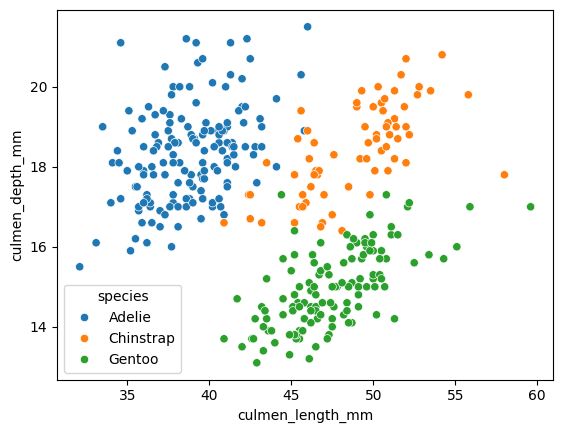

In [15]:
sns.scatterplot(x = 'culmen_length_mm',y = 'culmen_depth_mm',data = df,hue = 'species')

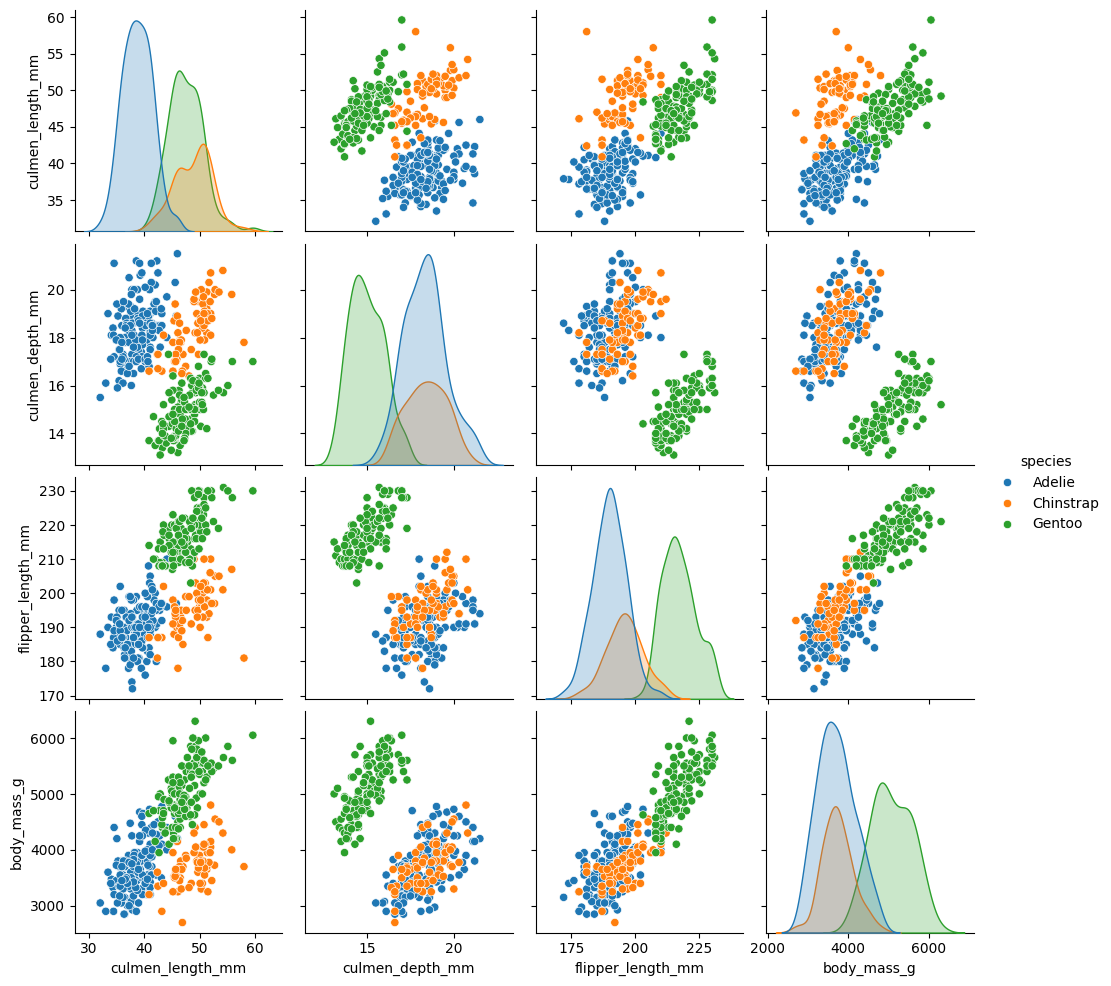

In [16]:
sns.pairplot(df,hue = 'species')
plt.show()

**Data Cleaning**

In [17]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [18]:
df['sex'].replace('.','MALE',inplace = True)

In [19]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [20]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(),inplace = True)

df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(),inplace = True)

df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(),inplace = True)

df['body_mass_g'].fillna(df['body_mass_g'].mean(),inplace = True)

df['sex'].fillna(df['sex'].mode()[0],inplace = True)


In [21]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**Encoding**

In [22]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first = True)
y = df['species']
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,False,True,True
1,39.50000,17.40000,186.000000,3800.000000,False,True,False
2,40.30000,18.00000,195.000000,3250.000000,False,True,False
3,43.92193,17.15117,200.915205,4201.754386,False,True,True
4,36.70000,19.30000,193.000000,3450.000000,False,True,False
...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,False,False,True
340,46.80000,14.30000,215.000000,4850.000000,False,False,False
341,50.40000,15.70000,222.000000,5750.000000,False,False,True
342,45.20000,14.80000,212.000000,5200.000000,False,False,False


- 🧠 Code:

- X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
- y = df['species']
- ✅ What It Does:
- 🔹 df.drop('species', axis=1)
- This removes the species column from the DataFrame.

- axis=1 tells pandas to drop a column (not a row).

- We do this because species is the target variable (i.e., what we want to predict), not a feature (input).

- 🔹 pd.get_dummies(..., drop_first=True)
- This function converts categorical variables (like island, sex) into numerical "dummy variables", which are required for most machine learning models.

- Why? ML algorithms can’t understand text labels like "Male" or "Biscoe" — they need numeric values.

- 🔹 drop_first=True
- This tells pandas to drop the first category of each categorical variable to avoid the dummy variable trap.

- The dummy variable trap happens when all dummy variables are included, creating multicollinearity — where features are linearly dependent on each other. This can confuse some models, especially linear ones.

- Example: Let’s say your island column has 3 categories: Biscoe, Dream, Torgersen.

- Without drop_first:

|island_Biscoe | island_Dream | island_Torgersen|
|--------------|--------------|-----------------|
   |   1 |              0  |               0|
  |    0  |             1 |                0|
 |     0   |            0|                 1|

- With drop_first=True (drops first one: Biscoe):

|island_Dream | island_Torgersen|
 |------------|-----------------|
|0             | 0   → implies Biscoe|
|1              |0   → Dream|
| 0              |1   → Torgersen|

- So you can still infer the first category from the absence of the others.

- 🔹 X and y:
- X: Feature matrix (input) — all columns except species, and with categorical columns converted to numbers.

- y: Target vector — the species column, which we want to predict.

- ⚙️ Why Do We Use This?

- Reason	Explanation
- 🧠 Model Compatibility	ML models (e.g., Logistic Regression, SVM, etc.) need numeric input.
- 🧹 Clean Data	Prepares the dataset in a format ready for model training.
- ⚠️ Avoid Multicollinearity	drop_first=True prevents redundant columns that could confuse the model.
- 🎯 Separate Features and Target	X and y structure is standard for training models using scikit-learn.
- ✅ In Summary:

- X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
- Prepares your features (X) by:

- Removing the target column.

- Converting all categorical values to numeric.

- Avoiding redundancy with drop_first=True.

- And this line:

- y = df['species']
- Sets your target variable for prediction.

**Train/Test Split**

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =6)

**Step-4,5:Modelling & Evaluation**

**Decision Tree Classifier - with default Hyperparameters**

In [24]:
# Modelling 
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state = 0)
dt_default.fit(X_train,y_train)


DecisionTreeClassifier(random_state=0)

- 🔍 Code:

- from sklearn.tree import DecisionTreeClassifier
- dt_default = DecisionTreeClassifier(random_state=0)
- dt_default.fit(X_train, y_train)
- 🧠 What Each Line Means:
- ✅ from sklearn.tree import DecisionTreeClassifier
- This line imports the DecisionTreeClassifier class from scikit-learn's tree module.

- This classifier builds a decision tree that learns from the data and makes predictions based on learned rules.

- It's a type of supervised learning algorithm used for both classification and regression (here, for classification).

- ✅ dt_default = DecisionTreeClassifier(random_state=0)
- This creates an instance of a decision tree classifier with default settings.

- random_state=0 sets a seed for reproducibility — ensures the same results every time you run the code.

- 💡 What happens inside:
- The classifier will use the Gini Impurity criterion by default to split the data.

- Default max depth of the tree is unlimited, which means it may grow until all leaves are pure (which can cause overfitting).

- Other important default parameters include:

- criterion='gini': How the quality of a split is measured (Gini Index).

- splitter='best': Chooses the best split.

- max_depth=None: No limit on how deep the tree can grow.

- You can customize it like:


- DecisionTreeClassifier(max_depth=3, criterion='entropy')
- ✅ dt_default.fit(X_train, y_train)
- This line trains (fits) the decision tree model on your training data.

- X_train: Feature matrix (inputs) — like culmen length, depth, island, etc.

- y_train: Target values — the penguin species.

- What it does during .fit():
- The algorithm recursively splits the data into smaller groups (branches) using the most informative features (i.e., the ones that reduce impurity the most).

- The result is a tree structure that models decision rules — e.g.,

- "If culmen_length < 45mm and flipper_length > 200mm, then it’s probably a Gentoo."

- 🌳 Why Use a Decision Tree Classifier?

- Feature	Benefit
- ✅ Easy to understand	Tree structure mimics human decision-making.
- ✅ Handles both numerical and categorical data	No need for feature scaling.
- ✅ Requires little data preprocessing	Can handle missing values or unscaled features.
- ❗ Can overfit	Especially if the tree is too deep or not pruned.
- 📊 Example Use Cases:
- Classifying penguin species (your case).

- Predicting customer churn.

- Diagnosing diseases based on symptoms.

In [25]:

# Prediction 
pred_train = dt_default.predict(X_train)
base_pred = dt_default.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print('Train Accuracy:',accuracy_score(y_train,pred_train))
print('Test Accuracy:',accuracy_score(y_test,base_pred))

from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(dt_default,X_train,y_train,cv = 5,scoring = 'accuracy').mean())

Train Accuracy: 1.0
Test Accuracy: 1.0
Cross Validation Score: 0.9636363636363635


**Visualize the Tree**

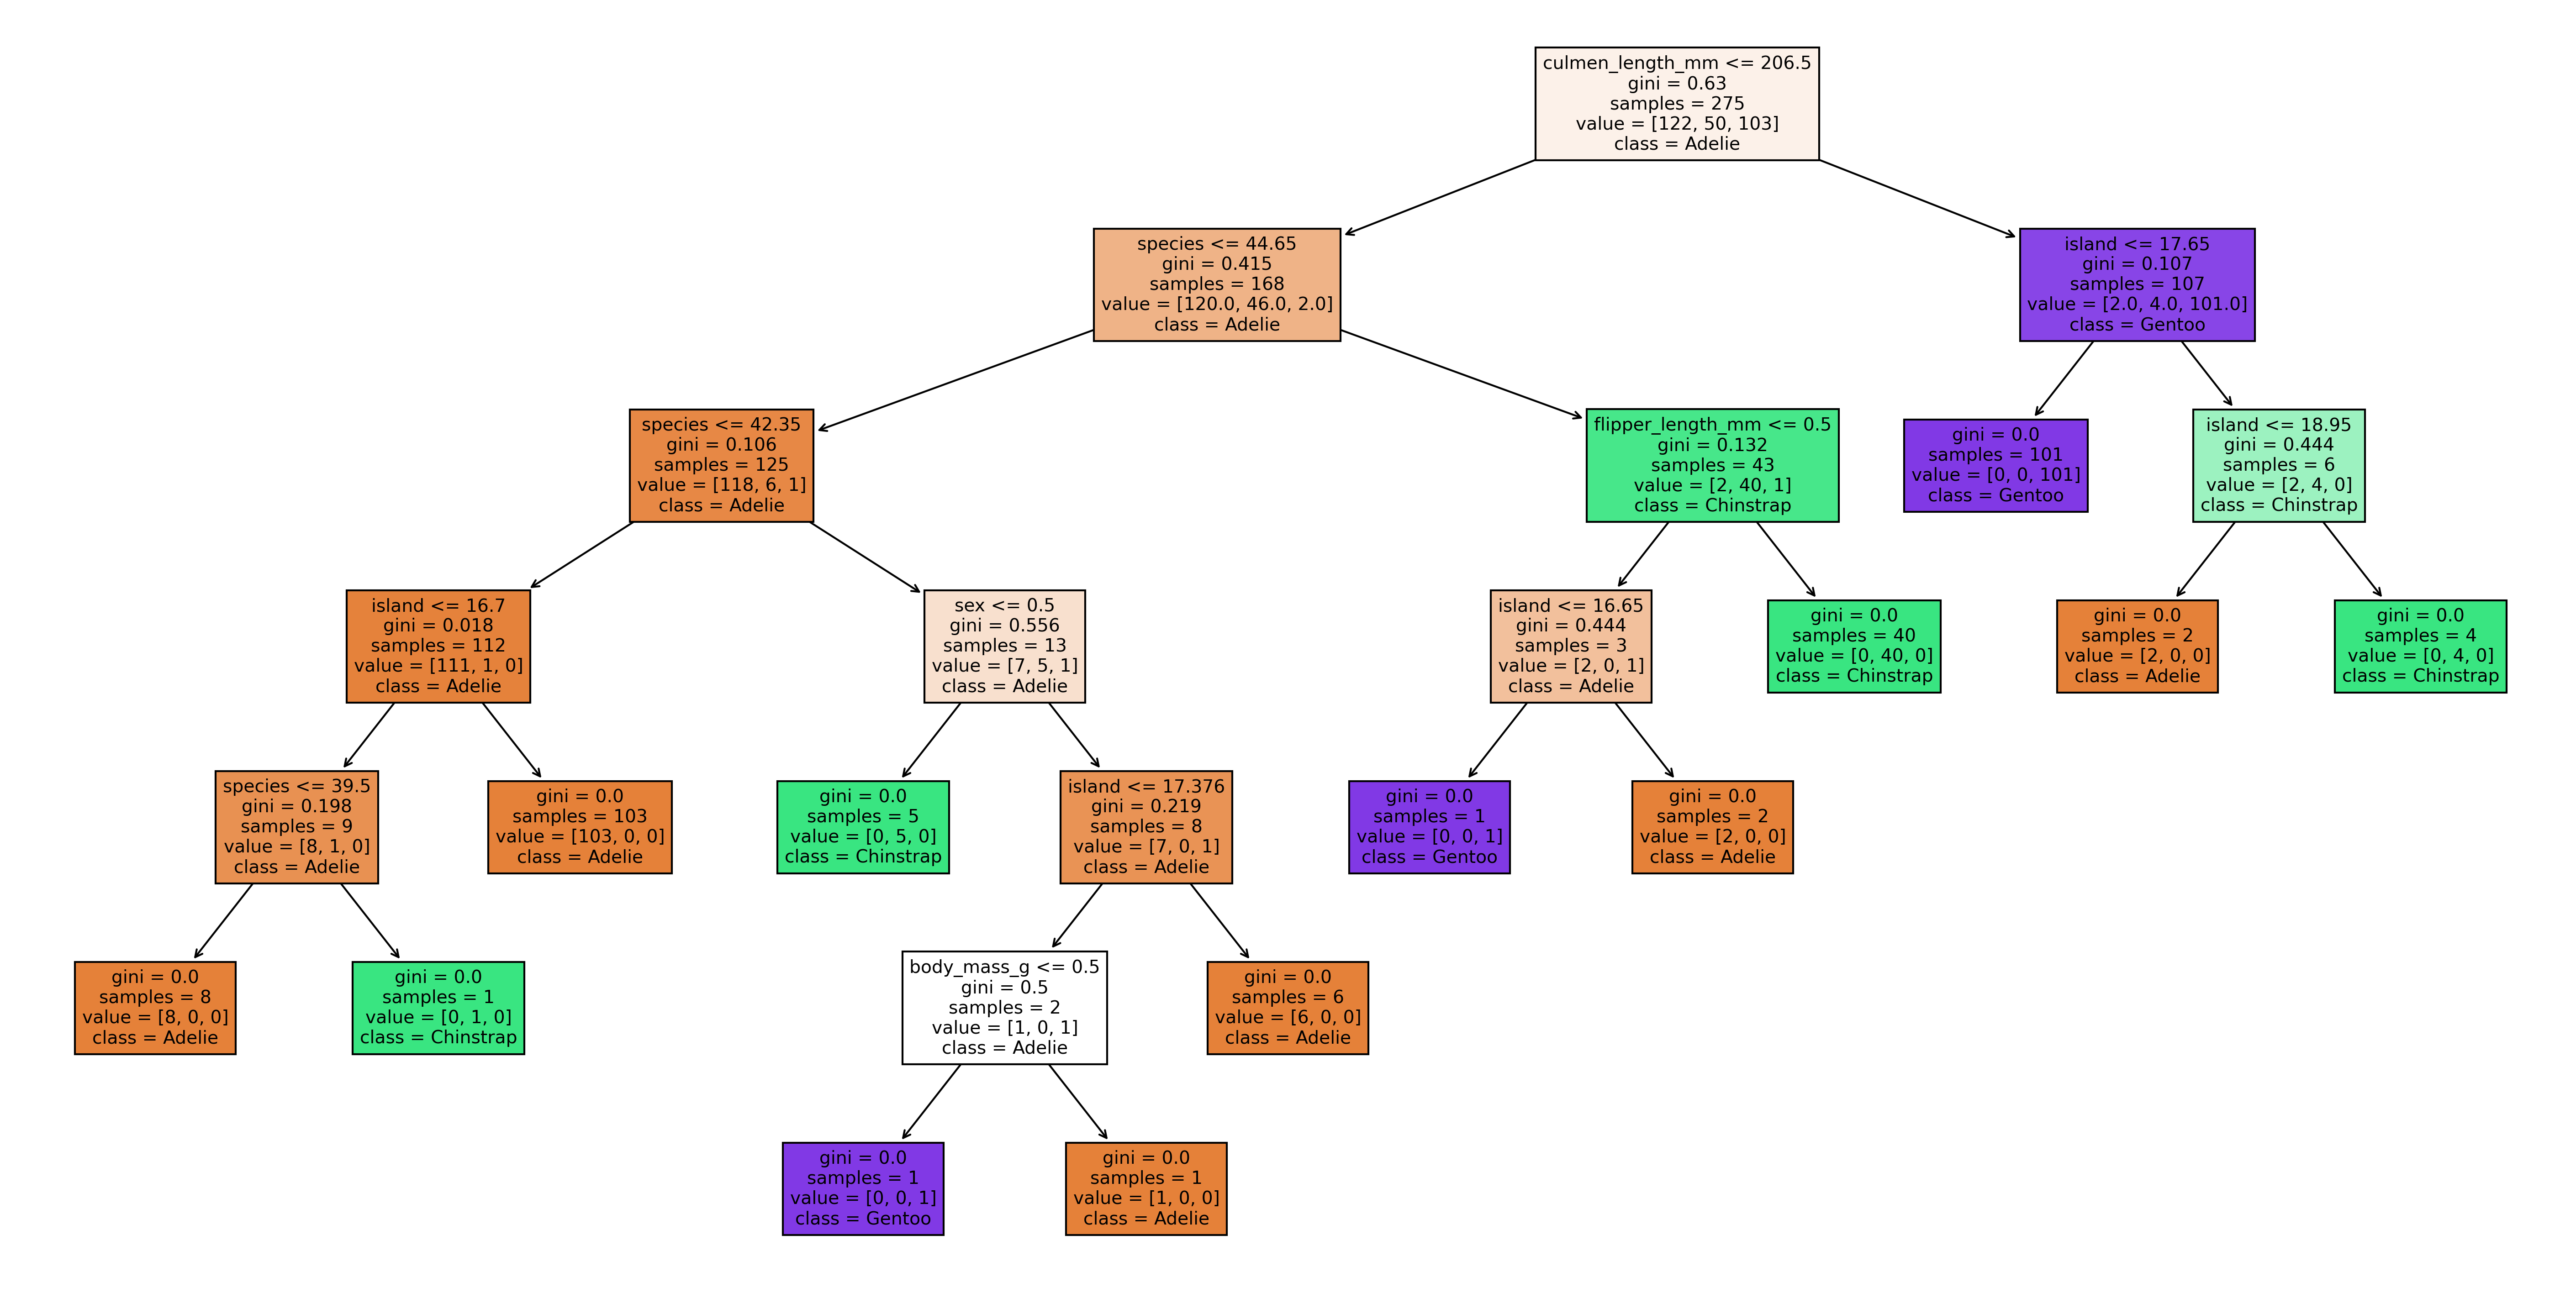

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize = (24,12),dpi = 300)

plot_tree(dt_default,
         filled = True,
         feature_names =['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
          class_names = ['Adelie', 'Chinstrap', 'Gentoo'])
plt.show()


- 🔍 Full Code:

- from sklearn.tree import plot_tree
- plt.figure(figsize=(24, 12), dpi=300)

- plot_tree(dt_default,
          filled=True,
          feature_names=['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
                         'flipper_length_mm', 'body_mass_g', 'sex'],
          class_names=['Adelie', 'Chinstrap', 'Gentoo'])

- plt.show()
- ✅ Line-by-Line Explanation
- 🔹 from sklearn.tree import plot_tree
- This imports the plot_tree function from scikit-learn.

- It's used to draw the structure of the decision tree model in a nice, readable diagram format.

- 🔹 plt.figure(figsize=(24, 12), dpi=300)
- This sets up a new figure using Matplotlib.

- figsize=(24, 12): Makes the plot big enough to see all tree nodes clearly (24 inches wide by 12 inches tall).

- dpi=300: Sets the resolution to 300 dots per inch, which makes the image high-quality and crisp, especially useful if saving or printing the plot.

- 🔹 plot_tree(...)
- This is where the tree is actually plotted. Let’s break down each argument passed into plot_tree():

- 🔸 dt_default
- This is your trained decision tree classifier.

- It was trained using .fit(X_train, y_train) earlier.

- plot_tree() reads the tree structure (nodes, splits, leaves) from this model.

- 🔸 filled=True
- Colors each node based on the majority class in that node.

- Darker shades = higher purity (one class dominates).

- Makes the tree easier to read and interpret visually.

- 🔸 feature_names=[...]
- A list of names for the input features used in the model.

- Important: This must match the order of columns in X_train.

- ⚠️ Caution: The list in your code contains 'species', which shouldn't be there because it's the target (not a feature).
- So this line should probably be:

- feature_names=X.columns
- That way, it uses the actual features used during training after get_dummies().

- 🔸 class_names=['Adelie', 'Chinstrap', 'Gentoo']
- Provides human-readable labels for the output classes (target labels).

- These are the possible penguin species your model predicts.

- 🔹 plt.show()
- This line displays the plot.

- It's necessary to actually show the tree diagram when running in notebooks or scripts.

- 🌳 What This Code Does Overall
- Draws a decision tree diagram that visually shows:

- How the tree splits the data using different features

- Conditions used at each node (like culmen_depth_mm <= 16.5)

- How the data is classified (Adelie, Chinstrap, or Gentoo)

- Sample count and class distribution in each node

- Color-coded nodes based on dominant species

- 📌 Why Use This?

- Reason	Benefit
- 🧠 Understand Model Logic	You can see the exact decision rules the tree learned.
- 🔎 Debugging	Helps check for overfitting or shallow trees.
- 📚 Education	Perfect for explaining how decision trees work in ML.
- 🧪 Feature Importance	Helps see which features the model uses the most.
- ✅ Example of What You Might See:

- Node 0:
- culmen_depth_mm <= 16.9
- samples = 300
- value = [150, 50, 100]
- class = Adelie
- This means:

- If culmen_depth_mm <= 16.9, go to left child

- This node contains 300 samples: 150 Adelie, 50 Chinstrap, 100 Gentoo

- Majority class is Adelie

- ⚠️ Fix for Your Code (Important):
- Your feature_names list should match the actual input features used in training. Since you used pd.get_dummies() earlier, the features are different now (like island_Dream, sex_MALE, etc.). Here's how you can fix it:

- plot_tree(dt_default,
          filled=True,
          feature_names=X.columns,
          class_names=['Adelie', 'Chinstrap', 'Gentoo'])

**HyperParameter Tunning**

In [27]:
from sklearn.model_selection import GridSearchCV

# model
estimator = DecisionTreeClassifier(random_state =0)

# parameters (which you want to tune and identify the best)
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[1,2,3,4,5
                         ]}
grid = GridSearchCV(estimator,param_grid,scoring = 'accuracy',cv =5)

grid.fit(X_train,y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

- ✅ Step-by-Step Explanation
- 🔸 from sklearn.model_selection import GridSearchCV
- This imports GridSearchCV, a tool for automated hyperparameter tuning.

- It systematically searches through combinations of parameters to find the best one based on model performance.

- 🔸 estimator = DecisionTreeClassifier(random_state=0)
This creates a base decision tree classifier model.

- random_state=0 ensures reproducibility (you get the same result every time you run it).

- But this model hasn't been trained yet — it's a template for GridSearchCV to use with different hyperparameters.

- 🔸 param_grid = {...}
This is the dictionary of parameters you want to test/tune.

- 📌 Meaning of Parameters:
- param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5]
}
- 'criterion': The method used to split the nodes.

- 'gini': Gini Impurity (default)

- 'entropy': Information Gain (more computationally expensive, sometimes better)

- 'max_depth': Maximum depth of the tree.

- A small depth prevents overfitting but might underfit.

- Larger depth increases complexity and might overfit.

- So you're testing from depth 1 to 5.

- Total combinations to test = 2 (criterion) × 5 (max_depth) = 10 models

- 🔸 grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
- This line sets up the grid search object.

- estimator: The base model (your decision tree).

- param_grid: The dictionary of parameters you want to test.

- scoring='accuracy': The metric used to evaluate the model (can also use f1, precision, etc.).

- cv=5: Use 5-fold cross-validation:

- Your training data is split into 5 equal parts.

- For each combination of parameters, the model is trained 5 times, each time using 4 folds to train and 1 to validate.

- The average accuracy over these 5 runs is calculated.

- 🔸 grid.fit(X_train, y_train)
- This line starts the grid search:

- It trains 10 models (one for each parameter combination) using 5-fold CV each.

- So it trains 10 × 5 = 50 models total under the hood.

- For each model:

- It records the accuracy score.

- Then compares them to find the best one.

- 🔸 grid.best_params_
- This returns a dictionary of the best parameter values found.

- For example:

- {'criterion': 'entropy', 'max_depth': 3}
- This means the best model (based on cross-validation accuracy) was the one using:

- entropy as the criterion

- Tree depth of 3

- 🔧 Why Use GridSearchCV?

- Benefit	Explanation
- 📊 Automated tuning	It finds the best combination of hyperparameters for you.
- 📈 Better performance	Often gives higher accuracy than default settings.
- 🔁 Cross-validation	Reduces the risk of overfitting by evaluating performance on multiple subsets.
- ✅ Systematic	Tries all combinations instead of guessing manually.
- 📘 Optional: See All Results
- You can see the performance of all tested models like this:

- pd.DataFrame(grid.cv_results_)
- Or access the best model:

- best_model = grid.best_estimator_
- Would you like to proceed w

**Importance of each feature given by this model**

In [28]:
grid.best_estimator_.feature_importances_

array([0.34390987, 0.05670105, 0.5346114 , 0.00774261, 0.02520849,
       0.        , 0.03182658])

- What grid.best_estimator_.feature_importances_ does,

- Why it’s used,

- How it works internally, and

- How you can use it to make your models better.

- ✅ What is the code doing?

- grid.best_estimator_.feature_importances_
- This line returns a NumPy array showing how important each feature is in making predictions in the - - best decision tree model found by GridSearchCV.

- 🔍 Breaking it down:
- 🔸 grid.best_estimator_
- This accesses the best model (Decision Tree) found by GridSearchCV.

- It’s the same as:

- best_model = grid.best_estimator_
- 🔸 .feature_importances_
- This is a built-in attribute of decision tree models (and some other tree-based models like Random Forest, XGBoost, etc.).

- It gives the importance score for each feature used in the model.

- 🧠 What Does “Feature Importance” Mean?
- A feature’s importance tells you how useful or valuable that feature was in building the decision tree:

- It is calculated based on how much a feature reduces impurity (like Gini or Entropy) across all splits it is used in.

- The more a feature is used to split data — and the more it helps the model make good decisions — the higher its importance score.

- 📊 Example Output:

- [0.10, 0.00, 0.35, 0.25, 0.05, 0.25]
- This would mean:

- The 1st feature contributed 10% to the model decisions.

- The 2nd feature wasn’t used at all (importance = 0.00).

- The 3rd feature was most important (35%).

- The values always add up to 1.0 (or 100%).

- 📌 Why Use Feature Importances?

- Purpose	Benefit
- 🧠 Model Explainability	Helps you understand which features matter most for predictions.
- 🧹 Feature Selection	You can remove low-importance features to simplify your model.
- 📈 Model Performance	Can help reduce overfitting and training time by using only important features.
- 🔍 Domain Insight	Helps researchers know which physical penguin traits are most useful for - - - --  identifying species.
- **🛠️ How to Use It in Practice:**
- Here’s how you might visualize the feature importances:

- import matplotlib.pyplot as plt
- import pandas as pd

- ###### Get importances and feature names
- importances = grid.best_estimator_.feature_importances_
- features = X.columns

- ###### Create a bar plot
- plt.figure(figsize=(10, 6))
- plt.barh(features, importances)
- plt.xlabel("Feature Importance Score")
- plt.ylabel("Feature")
- plt.title("Feature Importances in Best Decision Tree")
- plt.show()
- Want to go deeper?
- You can compare models with and without less important features, or explore permutation importance, which works with any model, not just tree-based.

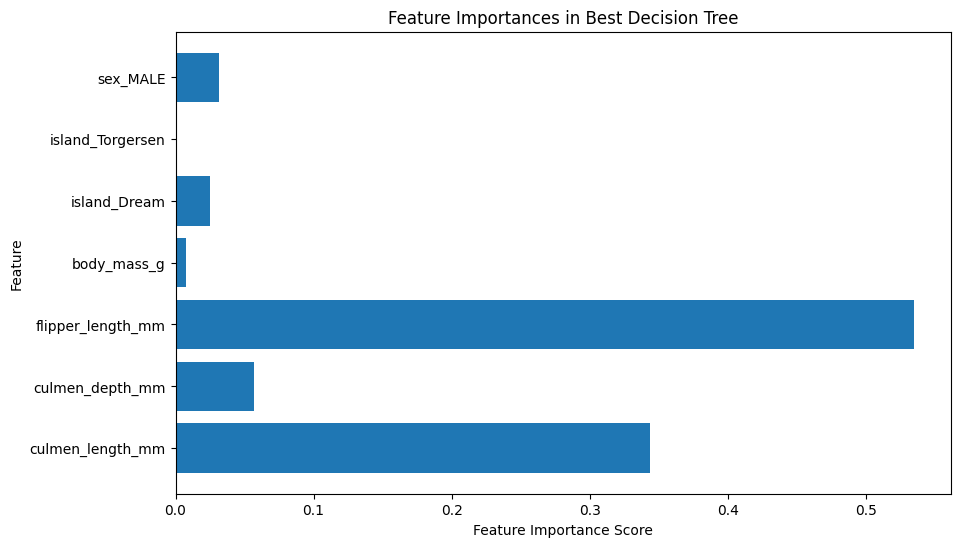

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Get importances and feature names
importances = grid.best_estimator_.feature_importances_
features = X.columns

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importances in Best Decision Tree")
plt.show()


**Identify the importance features**

In [29]:
feats = pd.DataFrame(data = grid.best_estimator_.feature_importances_,
                    index = X.columns
                    ,columns = ['Feature Importance'])
feats_imp = feats[feats['Feature Importance']>0]

important_features_list = feats_imp.index.to_list()
important_features_list 

['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'island_Dream',
 'sex_MALE']

- 🧠 What this code is doing overall:
- It creates a DataFrame of feature importances, filters out features with zero importance, and then saves the names of the remaining important features in a list.

- 🔍 Line-by-Line Explanation
- 🔸 feats = pd.DataFrame(data = grid.best_estimator_.feature_importances_, index = X.columns, columns = ['Feature Importance'])
- ✅ Purpose:
- Creates a pandas DataFrame that shows each feature and its corresponding importance.

- 🔧 Explanation:
- grid.best_estimator_.feature_importances_: This gives you a NumPy array of importance scores (one score per feature).

- X.columns: Names of your features (from the training data).

- columns=['Feature Importance']: The name of the single column in your new DataFrame.

- 🧾 Example Output:

   -                      Feature Importance
- culmen_length_mm                     0.35
- flipper_length_mm                   0.25
- body_mass_g                         0.00
- sex_MALE                            0.40
- 🔸 feats_imp = feats[feats['Feature Importance'] > 0]
- ✅ Purpose:
- Filters the DataFrame to keep only those features that actually contributed to the model (i.e., importance > 0).

- 📌 Why?
- Some features might not be used at all in the decision tree, especially if they didn’t help split the data well.

- These features will have an importance of 0.0, and this line removes them.

- 🧾 Example Output:
  -              Feature Importance
- culmen_length_mm               0.35
- flipper_length_mm             0.25
- sex_MALE                      0.40
- 🔸 important_features_list = feats_imp.index.to_list()
- ✅ Purpose:
- Converts the row indexes (i.e., feature names) of the filtered DataFrame into a Python list.

- 🧾 Output:

- ['culmen_length_mm', 'flipper_length_mm', 'sex_MALE']
- 📌 Why?
- This gives you a list of important features that can now be used for:

- Training a new model with fewer features

- Plotting or reporting

- Feature selection for better generalization

- 📘 Summary Table

|Code Line	|What It Does	|Why It’s Used|
|-----------|---------------|-------------|                   
|feats = pd.DataFrame(...)	|Create a DataFrame of features and their importance|	Easy to analyze, sort, and filter|
|feats_imp = feats[...] > 0	|Filter only the features with real impact|	Remove noise, simplify model|
|important_features_list = ...|	Make a list of those important feature names	|Reuse for training or analysis|

- 🛠️ Want to Do More?
- You could now:

- Plot only these important features

- Retrain a model using only important_features_list

- Save this list for future use

**Final Decision Tree Model**

**with best hyper parameters & with importance features**

In [30]:
# input with important feature
X_imp = X[important_features_list]

# train-test-split
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size = 0.2,random_state = 6)

# Model with best hyperparameters 
final_dt_model = DecisionTreeClassifier(criterion = 'gini',max_depth =5,random_state =0)
final_dt_model.fit(X_train,y_train)
ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

# Evaluatino 
print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('Test Accuracy:',accuracy_score(y_test,ypred_test))
print('Cross validation score:',cross_val_score(final_dt_model,X_train,y_train,cv = 5,scoring = 'accuracy').mean())

Train Accuracy: 0.9963636363636363
Test Accuracy: 1.0
Cross validation score: 0.9636363636363636


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[30,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 21]], dtype=int64)